In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns 

In [2]:
df = pd.read_csv('hw1.csv', parse_dates = ['Date'], index_col = ['Date'])

In [3]:
df.head()

,Zipcodes,Online Available,Pharmacy,Store Sales,Median Income,Population
Date,,,,,,
2015-01-01,90003,0,1,67385,18996,35177
2015-02-01,90003,0,1,67862,18996,35177
2015-03-01,90003,0,1,72886,18996,35177
2015-04-01,90003,0,1,59983,18996,35177
2015-05-01,90003,0,1,56489,18996,35177


In [4]:
df['Year'] = df.index.year
df['Month'] = df.index.month
df

,Zipcodes,Online Available,Pharmacy,Store Sales,Median Income,Population,Year,Month
Date,,,,,,,,
2015-01-01,90003,0,1,67385,18996,35177,2015,1
2015-02-01,90003,0,1,67862,18996,35177,2015,2
2015-03-01,90003,0,1,72886,18996,35177,2015,3
2015-04-01,90003,0,1,59983,18996,35177,2015,4
2015-05-01,90003,0,1,56489,18996,35177,2015,5
...,...,...,...,...,...,...,...,...
2016-08-01,96003,0,0,108016,31437,30310,2016,8
2016-09-01,96003,0,0,75790,31437,30310,2016,9
2016-10-01,96003,0,0,78439,31437,30310,2016,10


In [5]:
df1 = df[df['Online Available'] == 1]
df2 = df[df['Online Available'] == 0]

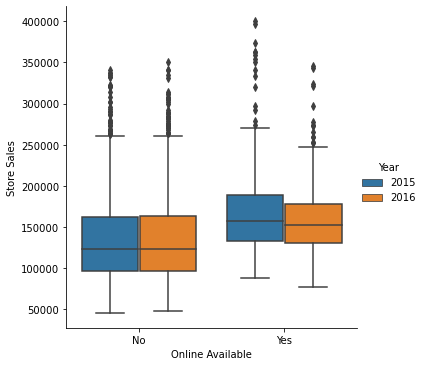

In [6]:
sns.catplot(data=df, x='Online Available',y='Store Sales', hue= 'Year', kind = 'box')
plt.xticks([0,1],['No', 'Yes'])
plt.show()


In [45]:
df.groupby(['Online Available', 'Year'])['Store Sales'].describe()

count           mean           std      min  \
Online Available Year                                                 
0                2015  1860.0  133341.284946  49643.548276  45491.0   
                 2016  1860.0  133906.888172  50109.639674  48364.0   
1                2015   396.0  166889.717172  50382.266358  88798.0   
                 2016   396.0  158422.242424  40541.476109  77890.0   

                             25%       50%        75%       max  
Online Available Year                                            
0                2015   96727.50  123627.5  162699.25  340626.0  
                 2016   97036.25  123854.5  163180.50  350586.0  
1                2015  133635.00  157441.0  188870.75  400218.0  
                 2016  130470.75  152129.0  178583.25  345635.0

In [52]:
df.groupby(['Online Available','Pharmacy', 'Year'])['Store Sales'].describe()

count           mean           std       min  \
Online Available Pharmacy Year                                                 
0                0        2015  876.0  127993.196347  51898.661907   46848.0   
                          2016  876.0  128395.577626  52356.250920   49191.0   
                 1        2015  984.0  138102.388211  47063.557315   45491.0   
                          2016  984.0  138813.298780  47512.686942   48364.0   
1                0        2015  240.0  168321.187500  57707.950671   88798.0   
                          2016  240.0  155454.654167  47083.459377   77890.0   
                 1        2015  156.0  164687.455128  36410.673101  102626.0   
                          2016  156.0  162987.762821  27123.796831  116817.0   

                                      25%       50%        75%       max  
Online Available Pharmacy Year                                            
0                0        2015   88262.25  111467.0  161567.25  320728.0  
                          2016   89111.00  111704.5  162773.00  314243.0  
                 1        2015  105754.50  130948.0  162891.25  340626.0  
                          2016  105705.50  129372.5  164070.25  350586.0  
1                0        2015  128079.50  155345.0  195958.25  400218.0  
                          2016  125107.75  144707.5  178409.75  345635.0  
                 1        2015  139511.75  159794.5  181481.75  292331.0  
                          2016  143499.75  160818.5  180483.25  258800.0

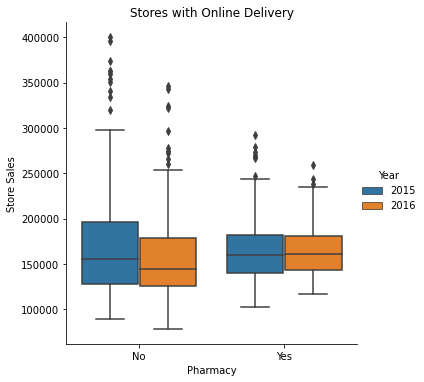

In [50]:
sns.catplot(data=df1, x='Pharmacy',y='Store Sales', hue= 'Year', kind = 'box')
plt.xticks([0,1],['No', 'Yes'])
plt.title('Stores with Online Delivery')
plt.show()

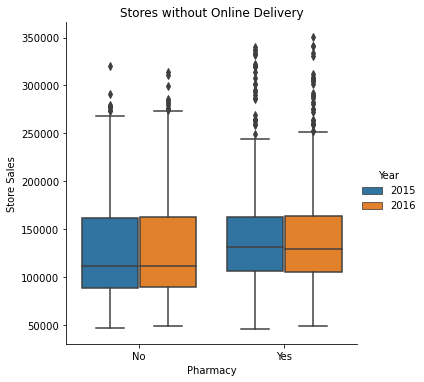

In [51]:
sns.catplot(data=df2, x='Pharmacy',y='Store Sales', hue= 'Year', kind = 'box')
plt.xticks([0,1],['No', 'Yes'])
plt.show()

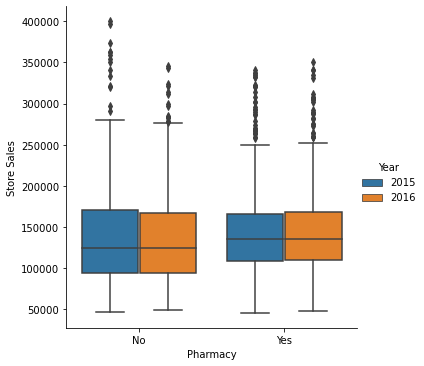

In [48]:
sns.catplot(data=df, x='Pharmacy',y='Store Sales', hue= 'Year', kind = 'box')
plt.xticks([0,1],['No', 'Yes'])
plt.show()

In [77]:
df.groupby('Zipcodes')['Median Income'].median().describe()

count      188.000000
mean     37363.856383
std      12996.949452
min      16576.000000
25%      27435.500000
50%      33706.000000
75%      44098.000000
max      91672.000000
Name: Median Income, dtype: float64

<AxesSubplot:xlabel='Income Level 1', ylabel='Median Income'>

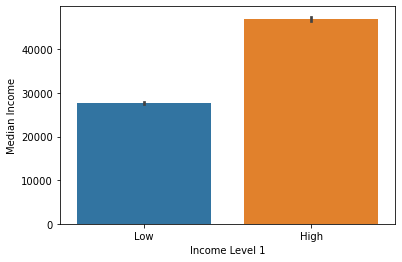

In [10]:
df['Income Level 1'] = pd.qcut(df['Median Income'], 2, labels = ['Low', 'High'])
sns.barplot(data=df, x = 'Income Level 1', y='Median Income')

In [14]:
df.groupby(['Online Available','Income Level 1', 'Year'])['Store Sales'].describe()

count           mean           std  \
Online Available Income Level 1 Year                                        
0                Low            2015  1128.0  107649.079787  31789.660217   
                                2016  1128.0  107777.661348  32049.195990   
                 High           2015   732.0  172932.551913  46056.196239   
                                2016   732.0  174171.598361  46098.475148   
1                High           2015   396.0  166889.717172  50382.266358   
                                2016   396.0  158422.242424  40541.476109   

                                          min        25%       50%        75%  \
Online Available Income Level 1 Year                                            
0                Low            2015  45491.0   86509.25  102227.5  125346.75   
                                2016  48364.0   85722.75  102341.5  123505.75   
                 High           2015  93777.0  138881.50  164986.5  200205.00   
                                2016  94903.0  139577.00  167055.5  198586.00   
1                High           2015  88798.0  133635.00  157441.0  188870.75   
                                2016  77890.0  130470.75  152129.0  178583.25   

                                           max  
Online Available Income Level 1 Year            
0                Low            2015  235144.0  
                                2016  224092.0  
                 High           2015  340626.0  
                                2016  350586.0  
1                High           2015  400218.0  
                                2016  345635.0

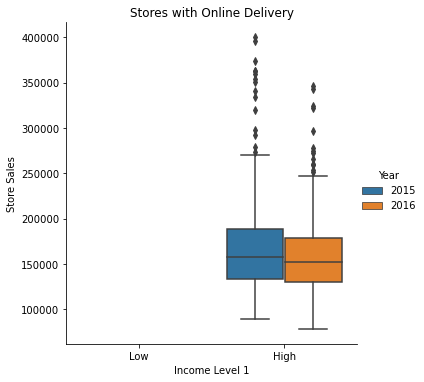

In [11]:
sns.catplot(data=df[df['Online Available'] == 1], x='Income Level 1',y='Store Sales', hue= 'Year', kind = 'box')
plt.title('Stores with Online Delivery')
plt.show()

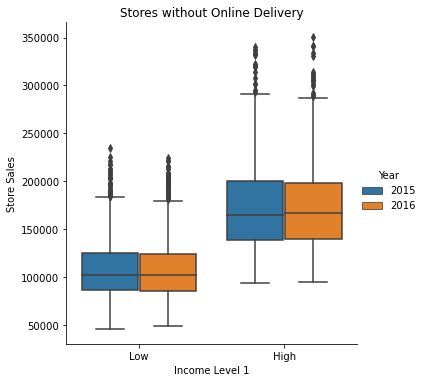

In [12]:
sns.catplot(data=df[df['Online Available'] == 0], x='Income Level 1',y='Store Sales', hue= 'Year', kind = 'box')
plt.title('Stores without Online Delivery')
plt.show()

<AxesSubplot:xlabel='Income Level 2', ylabel='Median Income'>

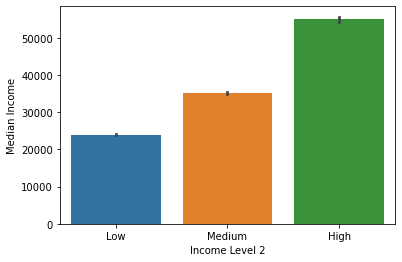

In [16]:
df['Income Level 2'] = pd.cut(df['Median Income'], bins=[0,27435.5,44098,91672], labels = ['Low', 'Medium', 'High'])
sns.barplot(data=df, x = 'Income Level 2', y='Median Income')

In [17]:
df.groupby(['Online Available','Income Level 2', 'Year'])['Store Sales'].describe()

count           mean           std  \
Online Available Income Level 2 Year                                       
0                Low            2015  564.0   93443.774823  24816.207125   
                                2016  564.0   92942.806738  23779.866202   
                 Medium         2015  912.0  132102.315789  34765.246402   
                                2016  912.0  132962.788377  35476.123728   
                 High           2015  384.0  194883.304688  45132.404939   
                                2016  384.0  196315.119792  44550.532873   
1                Medium         2015  216.0  144713.259259  29292.243661   
                                2016  216.0  141802.893519  28249.013556   
                 High           2015  180.0  193501.466667  57142.304038   
                                2016  180.0  178365.461111  43991.076552   

                                           min        25%       50%  \
Online Available Income Level 2 Year                                  
0                Low            2015   45491.0   75214.50   90373.5   
                                2016   48364.0   75986.75   90908.5   
                 Medium         2015   75757.0  105125.00  126097.5   
                                2016   75790.0  105575.50  126359.0   
                 High           2015  107545.0  163461.50  185846.0   
                                2016  114267.0  164185.50  188612.0   
1                Medium         2015   88798.0  122953.00  140735.0   
                                2016   77890.0  122073.50  142180.0   
                 High           2015  115884.0  152769.25  182842.5   
                                2016  114105.0  145820.00  170500.0   

                                            75%       max  
Online Available Income Level 2 Year                       
0                Low            2015  108760.50  163039.0  
                                2016  108434.50  165908.0  
                 Medium         2015  152233.00  259868.0  
                                2016  154169.50  288603.0  
                 High           2015  218436.00  340626.0  
                                2016  217882.50  350586.0  
1                Medium         2015  165548.00  231930.0  
                                2016  161077.75  213996.0  
                 High           2015  219426.50  400218.0  
                                2016  201403.25  345635.0

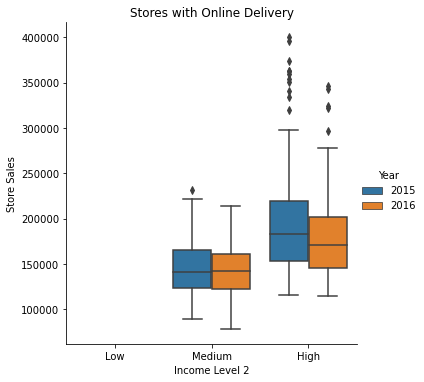

In [18]:
sns.catplot(data=df[df['Online Available'] == 1], x='Income Level 2',y='Store Sales', hue= 'Year', kind = 'box')
plt.title('Stores with Online Delivery')
plt.show()

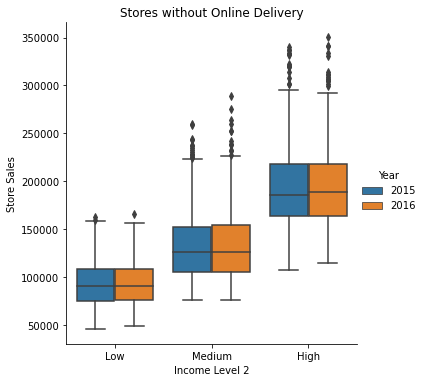

In [20]:
sns.catplot(data=df[df['Online Available'] == 0], x='Income Level 2',y='Store Sales', hue= 'Year', kind = 'box')
plt.title('Stores without Online Delivery')
plt.show()

<AxesSubplot:>

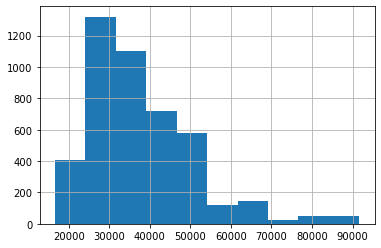

In [69]:
df['Median Income'].hist()

In [21]:
df.groupby('Zipcodes')['Population'].median().describe()

count      188.000000
mean     38700.595745
std       7311.235663
min      30080.000000
25%      32803.750000
50%      36750.500000
75%      42759.500000
max      65076.000000
Name: Population, dtype: float64

<AxesSubplot:xlabel='Population Level 1', ylabel='Population'>

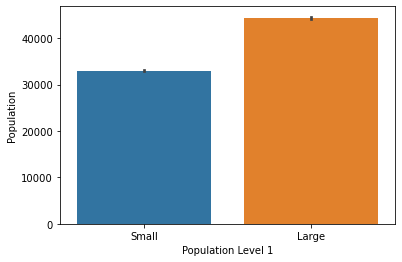

In [33]:
df['Population Level 1'] = pd.qcut(df['Population'], 2, labels = ['Small', 'Large'])
sns.barplot(data=df, x = 'Population Level 1', y='Population')

In [34]:
df.groupby(['Online Available','Population Level 1', 'Year'])['Store Sales'].describe()

count           mean           std  \
Online Available Population Level 1 Year                                       
0                Small              2015  888.0  118280.391892  46403.723310   
                                    2016  888.0  119258.338964  46541.608684   
                 Large              2015  972.0  147100.619342  48521.348960   
                                    2016  972.0  147289.513374  49528.442587   
1                Small              2015  240.0  147648.433333  37846.204301   
                                    2016  240.0  141049.987500  29717.662228   
                 Large              2015  156.0  196491.692308  52962.278191   
                                    2016  156.0  185148.788462  40504.335295   

                                               min        25%       50%  \
Online Available Population Level 1 Year                                  
0                Small              2015   45491.0   86483.25  105369.0   
                                    2016   48364.0   85270.75  105501.5   
                 Large              2015   51101.0  111263.25  137386.5   
                                    2016   49537.0  110833.25  137342.5   
1                Small              2015   88798.0  122953.00  138787.5   
                                    2016   77890.0  122247.50  137991.5   
                 Large              2015  125237.0  165520.00  184465.5   
                                    2016  122036.0  161138.50  178282.5   

                                                75%       max  
Online Available Population Level 1 Year                       
0                Small              2015  146178.50  332239.0  
                                    2016  148450.25  307192.0  
                 Large              2015  175846.75  340626.0  
                                    2016  175082.75  350586.0  
1                Small              2015  162328.00  292331.0  
                                    2016  156046.50  258800.0  
                 Large              2015  209577.50  400218.0  
                                    2016  202050.00  345635.0

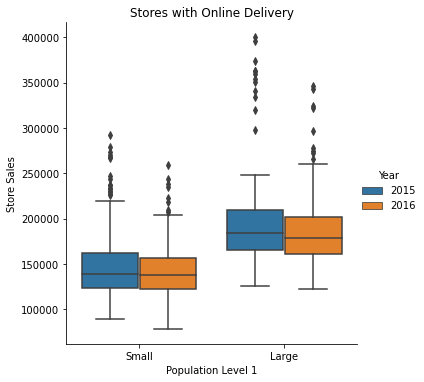

In [35]:
sns.catplot(data=df[df['Online Available'] == 1], x='Population Level 1',y='Store Sales', hue= 'Year', kind = 'box')
plt.title('Stores with Online Delivery')
plt.show()

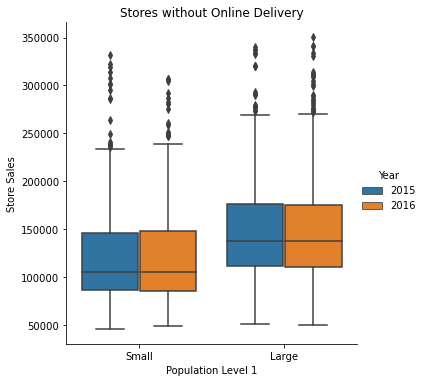

In [36]:
sns.catplot(data=df[df['Online Available'] == 0], x='Population Level 1',y='Store Sales', hue= 'Year', kind = 'box')
plt.title('Stores without Online Delivery')
plt.show()

<AxesSubplot:xlabel='Population Level 2', ylabel='Population'>

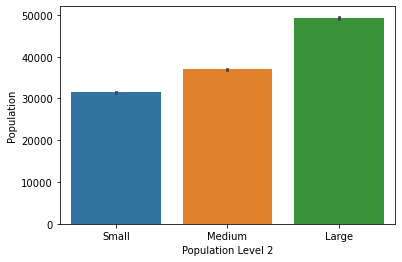

In [38]:
df['Population Level 2'] = pd.cut(df['Population'], bins=[0,32803.75,42759.5,65076], labels = ['Small', 'Medium', 'Large'])
sns.barplot(data=df, x = 'Population Level 2', y='Population')

In [40]:
df.groupby(['Online Available','Population Level 2','Year'])['Store Sales'].describe()

count           mean           std  \
Online Available Population Level 2 Year                                       
0                Small              2015  444.0  109297.608108  42192.054042   
                                    2016  444.0  110596.819820  42604.556412   
                 Medium             2015  924.0  129224.656926  45503.224578   
                                    2016  924.0  129607.054113  45070.593471   
                 Large              2015  492.0  162770.465447  49091.565782   
                                    2016  492.0  163018.101626  51723.124333   
1                Small              2015  120.0  146882.733333  46743.388482   
                                    2016  120.0  138285.650000  37584.333643   
                 Medium             2015  204.0  167382.558824  53581.994381   
                                    2016  204.0  159314.073529  40319.058575   
                 Large              2015   72.0  198838.305556  23212.242749   
                                    2016   72.0  189456.375000  21546.680059   

                                               min        25%       50%  \
Online Available Population Level 2 Year                                  
0                Small              2015   45491.0   77759.50   97741.0   
                                    2016   48364.0   77591.00   99348.5   
                 Medium             2015   51101.0   97812.50  118199.5   
                                    2016   49537.0   97723.75  118695.0   
                 Large              2015   74331.0  129478.00  155033.5   
                                    2016   70069.0  124142.50  156609.5   
1                Small              2015   88798.0  115851.00  131968.0   
                                    2016   77890.0  110006.00  131649.0   
                 Medium             2015  102626.0  137018.25  154877.5   
                                    2016  111642.0  133345.00  149803.5   
                 Large              2015  145618.0  182886.25  197273.0   
                                    2016  150737.0  172106.00  184167.5   

                                                75%       max  
Online Available Population Level 2 Year                       
0                Small              2015  140907.25  238323.0  
                                    2016  139398.25  233974.0  
                 Medium             2015  147597.50  332239.0  
                                    2016  151160.75  314243.0  
                 Large              2015  194035.75  340626.0  
                                    2016  196536.25  350586.0  
1                Small              2015  156280.25  292331.0  
                                    2016  153265.00  258800.0  
                 Medium             2015  175077.00  400218.0  
                                    2016  168306.00  345635.0  
                 Large              2015  219848.75  247710.0  
                                    2016  207392.25  251721.0

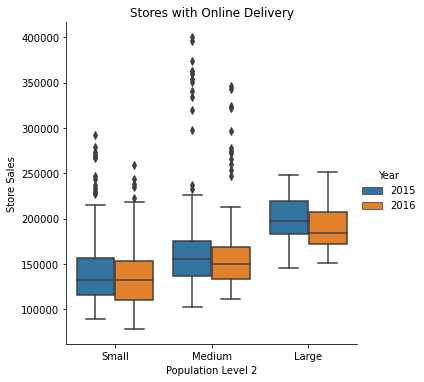

In [41]:
sns.catplot(data=df[df['Online Available'] == 1], x='Population Level 2',y='Store Sales', hue= 'Year', kind = 'box')
plt.title('Stores with Online Delivery')
plt.show()

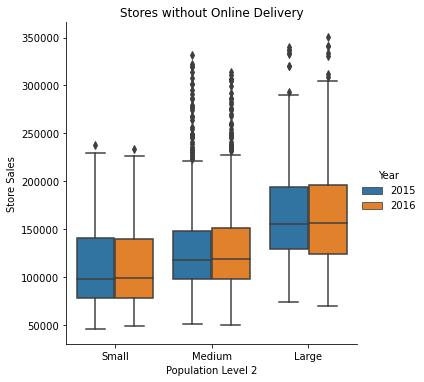

In [42]:
sns.catplot(data=df[df['Online Available'] == 0], x='Population Level 2',y='Store Sales', hue= 'Year', kind = 'box')
plt.title('Stores without Online Delivery')
plt.show()

<AxesSubplot:xlabel='Median Income', ylabel='Population'>

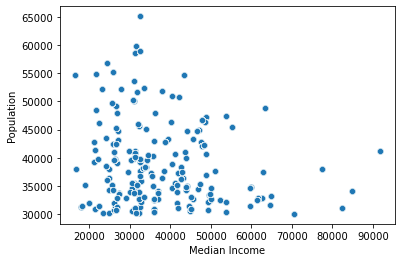

In [44]:
sns.scatterplot(data=df, x='Median Income', y='Population')

<AxesSubplot:xlabel='Median Income', ylabel='Population'>

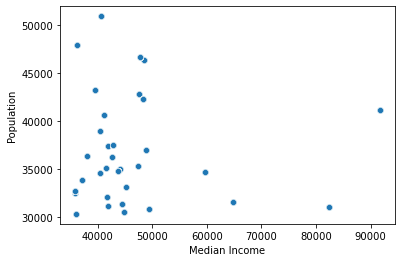

In [45]:
sns.scatterplot(data=df1, x='Median Income', y='Population')

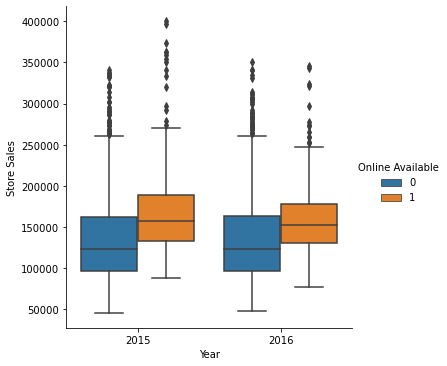

In [46]:
sns.catplot(data=df, x='Year',y='Store Sales', hue= 'Online Available', kind = 'box')
plt.show()

In [47]:
df1[['Population','Median Income']].describe()

,Population,Median Income
count,792.000000,792.000000
mean,36861.333333,46428.848485
std,5514.398206,12044.968827
min,30332.000000,35905.000000
25%,32523.000000,40491.000000
50%,35166.000000,42787.000000
75%,40607.000000,47732.000000
max,50950.000000,91672.000000
